# SVM on Dummy Data

In [1]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1,1],[2,1],[1,2],[1.5,1.5],[3,4],[2,5],[4,3],[7,2],[3,5],[2,6],[6,2],[3,4],[4,4]])
y = [0,1,0,0,1,1,1,1,1,1,1,1,1]

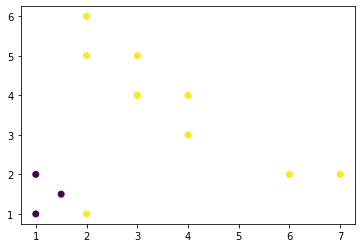

In [3]:
X_x1 = X[:,0]
X_x2 = X[:,1]
plt.scatter(X_x1,X_x2,c=y)
plt.show()

In [4]:
svcLinear = SVC(kernel='linear',C=1).fit(X,y)
svcLinear.coef_,svcLinear.intercept_ #Ø1f1 + Ø2f2 + Ø3 = 0 and Ø1,Ø2 are coef and Ø3 is intercept

(array([[0.8, 0.4]]), array([-2.6]))

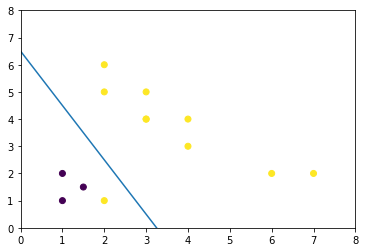

In [5]:
x1 = np.array([0,5])  #here we are taking f1 to be 0 and 5 and find the value of f2 and now for both the cases we have one point
# means two point then we draw a line using them to define the decision boundary
x2 = -1*(svcLinear.intercept_+svcLinear.coef_[0][0]*x1)/svcLinear.coef_[0][1]
plt.plot(x1,x2)  #Decision boundary
plt.scatter(X_x1,X_x2,c=y)
plt.axis([0,8,0,8])
plt.show()

In [6]:
svcLinear = SVC(kernel='linear',C=5.8).fit(X,y)
svcLinear.coef_,svcLinear.intercept_ #Ø1f1 + Ø2f2 + Ø3 = 0 and Ø1,Ø2 are coef and Ø3 is intercept

(array([[2.9000000e+00, 4.4408921e-16]]), array([-4.8]))

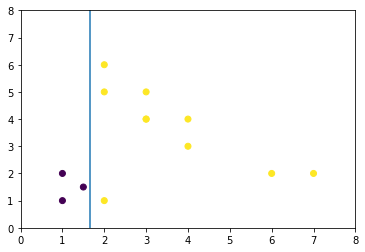

In [7]:
x1 = np.array([0,5])  #here we are taking f1 to be 0 and 5 and find the value of f2 and now for both the cases we have one point
# means two point then we draw a line using them to define the decision boundary
x2 = -1*(svcLinear.intercept_+svcLinear.coef_[0][0]*x1)/svcLinear.coef_[0][1]
plt.plot(x1,x2)  #Decision boundary
plt.scatter(X_x1,X_x2,c=y)
plt.axis([0,8,0,8])
plt.show()

# Conclusion:- as C increases the data tends to be a straight vertical line which shows as c changes P1 change itself to make C*p1 as a constant which means P1 decreases

# SVM on IRIS

In [8]:
from sklearn import svm,datasets
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [9]:
iris = datasets.load_iris()
x = iris.data[:,0:2]
y = iris.target

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [11]:
clf = svm.SVC(kernel='linear')
clf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
clf.score(x_test,y_test)

0.7631578947368421

In [13]:
def makegrid(x1,x2,h=0.02):
  x1_min,x1_max = x1.min() - 1,x1.max() + 1   # we are finding little bit more area to find the decision boundary
  x2_min,x2_max = x2.min()-1,x2.max() + 1
  a = np.arange(x1_min,x1_max,h)
  b = np.arange(x2_min,x2_max,h)
  xx,yy = np.meshgrid(a,b) #meshgrid will create all the possible points in our array by replicating them multiple times
  # [1,2,3],[2,3,4] = [[1,2],[1,3],[1,4],[2,2],[2,3],[2,4] and so on]
  return xx,yy

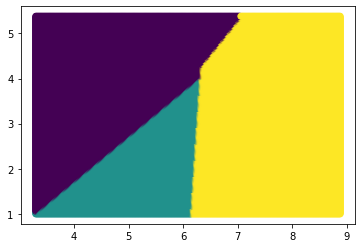

In [14]:
xx,yy = makegrid(x[:,0],x[:,1])
predictions = clf.predict(np.c_[xx.ravel(),yy.ravel()])   #ravel convert 2d Matrix to 1D array,c_ combine the points to make pairs
plt.scatter(xx.ravel(),yy.ravel(),c=predictions)
plt.show()

## Grid Search cross validation

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [16]:
clf = KNeighborsClassifier()
grid = {"n_neighbors":[3,5,7,9,11]}
abc = GridSearchCV(clf,grid)
abc.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [17]:
abc.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [18]:
clf = svm.SVC()
grid = {'C':[1e2,1e3,5e3,1e4,5e4,1e5],'gamma':[1e-3,5e-4,1e-4,5e-3]}
abc = GridSearchCV(clf,grid)
abc.fit(x_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [100.0, 1000.0, 5000.0, 10000.0, 50000.0,
                               100000.0],
                         'gamma': [0.001, 0.0005, 0.0001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [19]:
abc.best_estimator_

SVC(C=5000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Conclusion:- Best Cross Validation score we found at when C = 10,000  and gamma = 0.005



# SVM For Regression Problems

In [20]:
boston = datasets.load_boston()

In [21]:
X = boston.data
Y = boston.target

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [23]:
clf = svm.SVR(kernel="rbf")    #support vector regressor
clf.fit(X_train,Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [24]:
clf.score(X_test,Y_test)

0.09584057320437267

In [25]:
clf = svm.SVR(kernel="linear")
clf.fit(X_train,Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [26]:
clf.score(X_test,Y_test)

0.7014359007346826

In [27]:
clf = svm.SVR()
grid = {'C':[1e2,1e3,5e3,1e4,5e4,1e5],'gamma':[1e-3,5e-4,1e-4,5e-3]}
abc = GridSearchCV(clf,grid)
abc.fit(X_train,Y_train)
abc.best_estimator_

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [29]:
abc.score(X_test,Y_test)

0.7479580126894433